# **TRANSPORT DEMAND PREDICTION**


![Demand Prediction](https://www.thefulfillmentlab.com/hubfs/Demand%20Forecasting.jpeg)


## **Problem description**




The business challenge is to develop a predictive model that accurately forecasts the number of seats Mobiticket can expect to sell for each ride on a specific route, date, and time, considering 14 different routes originating from various towns and ending in Nairobi. The model should take into account factors such as traffic conditions, peak hours, passengers' preferences, and the influence of business hours, cultural events, political events, and holidays on people's movement patterns. This will help Mobiticket optimize its operations, better manage resources, and improve overall customer satisfaction.

## **Data description**


Variables description:
- ride_id: unique ID of a vehicle on a specific route on a specific day and time.
- seat_number: seat assigned to ticket
- payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
- payment_receipt: unique id number for ticket purchased from Mobiticket
- travel_date: date of ride departure. (MM/DD/YYYY)
- travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
- travel_from: town from which ride originated
- travel_to: destination of ride. All rides are to Nairobi.
- car_type: vehicle type (shuttle or bus)
- max_capacity: number of seats on the vehicle

## **Importing libraries and packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Pandas visual setting
pd.set_option('display.max_columns', None)


# To ignore irrelevent warnigns
import warnings
warnings.filterwarnings('ignore')

# Seaborn setting
# sns.set_style("white")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

## **Data Preprocessing and Cleaning**

### **Lets understand the data**


In [ ]:
# Set up the url
URL = 'https://drive.google.com/file/d/1DPyi7s-sDHwBPvO8LqGGPSUXzm2YDobO/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]

# Lets view the overall data
df = pd.read_csv(path,encoding= 'unicode_escape')
df.head(5)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
# Check the shape of data set
df.shape

(51645, 10)

There are 51645 observations in dataset and 10 columns

In [ ]:
# Let's get the stats of data
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


The data has 51645 observations for each variable.

In [ ]:
# Get the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
# Lets find the number of NaN values in each column
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

We don't see any null values in the dataset now.

so let us explore the dataset more

In [ ]:
# Check for the duplicate rows
print(f"The duplicate Rows are {df.duplicated().sum()}.")

The duplicate Rows are 0.


There are no duplicate values

In [ ]:
# Get the list of unique values of all columns with their frequencies
print('The unique values of all coulmns with their frequencies are: \n')
for i in df:
    print(df[i].value_counts()/51645*100)
    print("="*35 + "||")

The unique values of all coulmns with their frequencies are: 

8454     0.096815
13211    0.094878
10834    0.094878
8090     0.094878
11382    0.094878
           ...   
10090    0.001936
10091    0.001936
10114    0.001936
10116    0.001936
14304    0.001936
Name: ride_id, Length: 6249, dtype: float64
===================================||
1      3.998451
8      3.520186
10     3.464033
2      3.454352
7      3.450479
         ...   
25     0.989447
23B    0.983638
1A     0.528609
2A     0.334979
14     0.001936
Name: seat_number, Length: 61, dtype: float64
===================================||
Mpesa    99.781199
Cash      0.218801
Name: payment_method, dtype: float64
===================================||
UZUEHCBUSO    0.001936
DEGY2Q28CJ    0.001936
SDJE7ICGXD    0.001936
EJS0PLGX9U    0.001936
N3HNPCJESG    0.001936
                ...   
TWPE9PKLX8    0.001936
U3ADERBRTU    0.001936
VGLBZAIYLZ    0.001936
U2QHJIFFBW    0.001936
AQN7FBUSGP    0.001936
Name: payment_receipt, Length: 

-The record of 149 days out of 2 year is present in this dataset
-There are two type of cars: Bus and shuttle and the maximum capacity of the bus is 49 while shuttle can contain 11 travelers.


### **Lets Clean the data and create some new features**

In [ ]:
# Convert the date in datetime format
df['travel_date'] = pd.to_datetime(df['travel_date'], dayfirst=True)

# Extract month, day, year, day_of_week,is_weekend
df["day_of_week"]=df["travel_date"].dt.dayofweek
df['Month'] = pd.DatetimeIndex(df['travel_date']).month
df['day'] = pd.DatetimeIndex(df['travel_date']).day
df['Year'] = pd.DatetimeIndex(df['travel_date']).year
df['day_of_week'] = df['travel_date'].dt.day_name()
df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in ['Saturday','Sunday'] else 0 )
df["travel_day"] = df["travel_date"].dt.dayofyear

# Lets view again
df.head(5)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,travel_day
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,Tuesday,10,17,2017,0,290
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday,11,19,2017,1,323
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday,11,26,2017,1,330
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,Monday,11,27,2017,0,331
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,Monday,11,27,2017,0,331


In [ ]:
# convert the time column to a datetime format
df['travel_time'] = pd.to_datetime(df['travel_time'], format='%H:%M')

# convert the datetime format to a time format
df['travel_time'] = df['travel_time'].dt.time

# convert the time format to a string format
df['travel_time'] = df['travel_time'].apply(lambda x: x.strftime('%H:%M:%S'))

# convert the string format to a timedelta format
df['travel_time'] = pd.to_timedelta(df['travel_time'])

# convert the timedelta format to a float format representing hours
df['hours'] = df['travel_time'].dt.total_seconds() / 3600



# print the resulting DataFrame
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,travel_day,hours
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,0 days 07:15:00,Migori,Nairobi,Bus,49,Tuesday,10,17,2017,0,290,7.250000
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,0 days 07:12:00,Migori,Nairobi,Bus,49,Sunday,11,19,2017,1,323,7.200000
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,0 days 07:05:00,Keroka,Nairobi,Bus,49,Sunday,11,26,2017,1,330,7.083333
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,0 days 07:10:00,Homa Bay,Nairobi,Bus,49,Monday,11,27,2017,0,331,7.166667
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,0 days 07:12:00,Migori,Nairobi,Bus,49,Monday,11,27,2017,0,331,7.200000


### **Finding Our Target Variable**

Since we are not given the target variable so we need to find target variable first.

There might be many ways of finding the target variable but here I am using one way : I will find number of 'payment_receipt' coreesponding to each 'ride_id' and store it in 'number_of_ticket' as our target variable.

In [ ]:
grouped_df = df.groupby('ride_id').agg({'payment_receipt': 'count'}).rename(columns={'payment_receipt': 'number_of_ticket'}).reset_index()
grouped_df.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


Now let us merge two datasets on ride_id key to make the final dataset where we have dependent as well as independent variables too.

In [ ]:
df = df.merge(grouped_df, on='ride_id', how='left')
df.head()
# train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,travel_day,hours,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,0 days 07:15:00,Migori,Nairobi,Bus,49,Tuesday,10,17,2017,0,290,7.250000,1
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,0 days 07:12:00,Migori,Nairobi,Bus,49,Sunday,11,19,2017,1,323,7.200000,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,0 days 07:05:00,Keroka,Nairobi,Bus,49,Sunday,11,26,2017,1,330,7.083333,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,0 days 07:10:00,Homa Bay,Nairobi,Bus,49,Monday,11,27,2017,0,331,7.166667,5
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,0 days 07:12:00,Migori,Nairobi,Bus,49,Monday,11,27,2017,0,331,7.200000,31


Lets add festival and events information in the data for East Africa for given timeperiod

In [ ]:
# Create the dataframe for popular events for East Africa
data = [
    (1, '2017-10-20', 'Mashujaa Day', 'Holiday'),
    (2, '2017-10-26', 'Presidential Election Re-run', 'Political'),
    (3, '2017-12-12', 'Jamhuri Day', 'Holiday'),
    (4, '2017-12-25', 'Christmas Day', 'Holiday'),
    (5, '2017-12-26', 'Boxing Day', 'Holiday'),
    (6, '2018-01-01', 'New Year\'s Day', 'Holiday'),
    (7, '2018-03-30', 'Good Friday', 'Holiday')
]

columns = ['Event_ID', 'travel_date', 'Event_Name', 'Event_Type']

df_kenya = pd.DataFrame(data, columns=columns)
df_kenya['travel_date'] = pd.to_datetime(df_kenya['travel_date'])

df_kenya

,Event_ID,travel_date,Event_Name,Event_Type
0,1,2017-10-20,Mashujaa Day,Holiday
1,2,2017-10-26,Presidential Election Re-run,Political
2,3,2017-12-12,Jamhuri Day,Holiday
3,4,2017-12-25,Christmas Day,Holiday
4,5,2017-12-26,Boxing Day,Holiday
5,6,2018-01-01,New Year's Day,Holiday
6,7,2018-03-30,Good Friday,Holiday


Merge the events data in our original dataset using datatime column

In [ ]:
# Since the date in travel_date column is in same format therefore we can directly use merge operation here
df = df.merge(df_kenya, on='travel_date', how='left')
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,travel_day,hours,number_of_ticket,Event_ID,Event_Name,Event_Type
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,0 days 07:15:00,Migori,Nairobi,Bus,49,Tuesday,10,17,2017,0,290,7.250000,1,NaN,NaN,NaN
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,0 days 07:12:00,Migori,Nairobi,Bus,49,Sunday,11,19,2017,1,323,7.200000,1,NaN,NaN,NaN
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,0 days 07:05:00,Keroka,Nairobi,Bus,49,Sunday,11,26,2017,1,330,7.083333,1,NaN,NaN,NaN
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,0 days 07:10:00,Homa Bay,Nairobi,Bus,49,Monday,11,27,2017,0,331,7.166667,5,NaN,NaN,NaN
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,0 days 07:12:00,Migori,Nairobi,Bus,49,Monday,11,27,2017,0,331,7.200000,31,NaN,NaN,NaN


In [ ]:
# # One-hot encode the 'Event_Type' column
# df_kenya_encoded = pd.get_dummies(df_kenya, columns=['Event_Type'], prefix='Event_Type')

# # Display the encoded dataframe
# df_kenya_encoded

In [ ]:

# # merge the two datasets on a common column
# df_merged = df.merge(df_kenya, on='travel_date', how='left')

# # save the merged dataset to a new file
# df_merged.to_csv('merged_dataset.csv', index=False)


Dropping redundant columns

In [ ]:
df = df.drop(['payment_receipt','payment_method','seat_number', 'travel_date','travel_time','travel_to', 'Event_ID', 'Event_Type'], axis = 1)

In [ ]:
# Check for the duplicate rows
print(f"The duplicate Rows are {df.duplicated().sum()}.")

The duplicate Rows are 45396.


Now we found our target variable so let us delete the duplicate values.

In [ ]:
#Removing duplicated rows
df = df.drop_duplicates()
df.shape

(6249, 13)

In [ ]:
df.head()

,ride_id,travel_from,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,travel_day,hours,number_of_ticket,Event_Name
0,1442,Migori,Bus,49,Tuesday,10,17,2017,0,290,7.250000,1,NaN
1,5437,Migori,Bus,49,Sunday,11,19,2017,1,323,7.200000,1,NaN
2,5710,Keroka,Bus,49,Sunday,11,26,2017,1,330,7.083333,1,NaN
3,5777,Homa Bay,Bus,49,Monday,11,27,2017,0,331,7.166667,5,NaN
4,5778,Migori,Bus,49,Monday,11,27,2017,0,331,7.200000,31,NaN


### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Print the shape of the training and test sets
print('Training set shape:', train.shape)
print('Test set shape:', test.shape)

Training set shape: (4999, 13)
Test set shape: (1250, 13)


In [ ]:
train.head()

,ride_id,travel_from,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,travel_day,hours,number_of_ticket,Event_Name
12517,8215,Homa Bay,Bus,49,Sunday,12,31,2017,1,365,7.150000,9,NaN
391,6038,Kisii,Bus,49,Tuesday,4,3,2018,0,93,7.116667,1,NaN
20335,9385,Kijauri,shuttle,11,Monday,1,29,2018,0,29,5.666667,1,NaN
26021,10408,Kijauri,shuttle,11,Monday,2,12,2018,0,43,6.500000,1,NaN
44338,12871,Homa Bay,Bus,49,Friday,3,30,2018,0,89,7.183333,1,Good Friday


In [ ]:
# mapping = {'Ndhiwa' : 'other', 'Sori' : 'other', 'Keumbu': 'other', 'Oyugis':'other', 'Kendu Bay' : 'other', 'Mbita' : 'other'}


# train['travel_from'].value_counts()

In [ ]:
# train['travel_from']=train['travel_from'].replace(mapping)
# train['travel_from'].value_counts()

In [ ]:
# mapping = train.groupby(['travel_from', 'day_of_week'], as_index = False).agg({'number_of_ticket': 'mean'}).rename(columns = {"number_of_ticket": "avg_weekly_tickets"})
# mapping.head()

In [ ]:
# train = train.merge(mapping, on=['travel_from', 'day_of_week'], how='left')
# train.head()

In [ ]:
# test = test.merge(mapping, on=['travel_from', 'day_of_week'], how='left')
# test.head()

Let's find total no. of days for which data has been provided

In [ ]:
# Find the value counts of the 'travel_day' column
No_of_days = train['travel_day'].value_counts()

print(No_of_days)

344    72
341    69
348    67
342    63
340    63
       ..
359     4
318     1
290     1
323     1
330     1
Name: travel_day, Length: 149, dtype: int64


In [ ]:
pd.read_csv(path,encoding= 'unicode_escape')['travel_date'].nunique()

149

Let's find number of buses from particular location each day.

In [ ]:
mapping = train.groupby(['travel_from'], as_index = False).agg({'ride_id': 'count'}).rename(columns = {'ride_id': "number_of_buses"})
mapping['number_of_buses_per_day'] = mapping['number_of_buses']/149

mapping.head()

,travel_from,number_of_buses,number_of_buses_per_day
0,Awendo,142,0.953020
1,Homa Bay,297,1.993289
2,Kehancha,146,0.979866
3,Kendu Bay,1,0.006711
4,Keroka,253,1.697987


In [ ]:
train = train.merge(mapping, on=['travel_from'], how='left')
train.head()

,ride_id,travel_from,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,travel_day,hours,number_of_ticket,Event_Name,number_of_buses,number_of_buses_per_day
0,8215,Homa Bay,Bus,49,Sunday,12,31,2017,1,365,7.150000,9,NaN,297,1.993289
1,6038,Kisii,Bus,49,Tuesday,4,3,2018,0,93,7.116667,1,NaN,2412,16.187919
2,9385,Kijauri,shuttle,11,Monday,1,29,2018,0,29,5.666667,1,NaN,443,2.973154
3,10408,Kijauri,shuttle,11,Monday,2,12,2018,0,43,6.500000,1,NaN,443,2.973154
4,12871,Homa Bay,Bus,49,Friday,3,30,2018,0,89,7.183333,1,Good Friday,297,1.993289


In [ ]:
test = test.merge(mapping, on=['travel_from'], how='left')
test.head()

,ride_id,travel_from,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,travel_day,hours,number_of_ticket,Event_Name,number_of_buses,number_of_buses_per_day
0,8771,Kisii,shuttle,11,Sunday,2,4,2018,1,35,10.883333,10,NaN,2412,16.187919
1,6794,Kisii,shuttle,11,Friday,3,9,2018,0,68,9.000000,11,NaN,2412,16.187919
2,10553,Keroka,shuttle,11,Wednesday,2,14,2018,0,45,10.333333,1,NaN,253,1.697987
3,8946,Kisii,shuttle,11,Thursday,2,1,2018,0,32,10.166667,10,NaN,2412,16.187919
4,12375,Sirare,Bus,49,Friday,3,16,2018,0,75,6.983333,3,NaN,147,0.986577


In [ ]:
train = train.drop(['ride_id','travel_day','number_of_buses'], axis = 1)

Now as our final data set is ready , let's find out numerical and categorical columns:

In [ ]:
train.columns

Index(['travel_from', 'car_type', 'max_capacity', 'day_of_week', 'Month',
       'day', 'Year', 'is_weekend', 'hours', 'number_of_ticket', 'Event_Name',
       'number_of_buses_per_day'],
      dtype='object')

In [ ]:
Categorical_columns = ['travel_from','car_type','max_capacity','Month','day', 'Year','day_of_week','is_weekend']
Numerical_columns   = ['hours', 'number_of_ticket','number_of_buses_per_day']

In [ ]:
# Get the description of all the numeric and datetime columns
train.describe()

,max_capacity,Month,day,Year,is_weekend,hours,number_of_ticket,number_of_buses_per_day
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,30.285057,4.906181,14.623325,2017.738748,0.250650,8.203571,8.162833,8.984155
std,18.999762,4.252650,8.417118,0.439361,0.433431,2.891050,8.443602,7.004809
min,11.000000,1.000000,1.000000,2017.000000,0.000000,5.000000,1.000000,0.006711
25%,11.000000,2.000000,8.000000,2017.000000,0.000000,7.066667,2.000000,1.993289
50%,49.000000,3.000000,14.000000,2018.000000,0.000000,7.166667,7.000000,3.912752
75%,49.000000,11.000000,21.000000,2018.000000,1.000000,8.666667,11.000000,16.187919
max,49.000000,12.000000,31.000000,2018.000000,1.000000,23.166667,50.000000,16.187919


##**Finding the insights, patterns and relations**

###    **Univariant Variable Analysis**

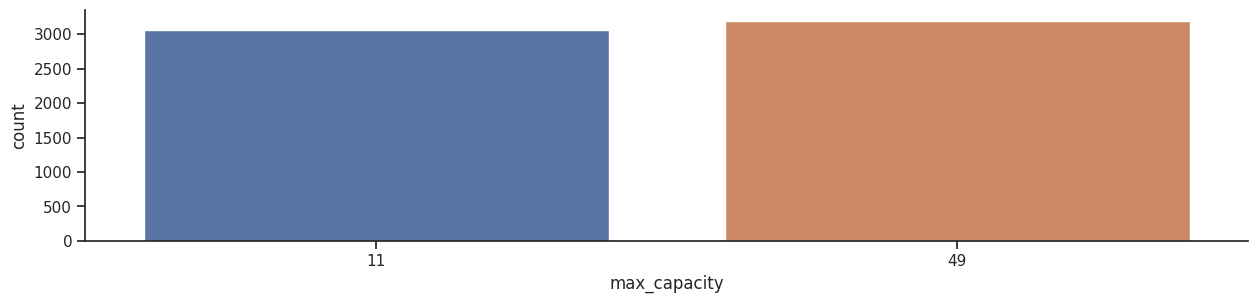

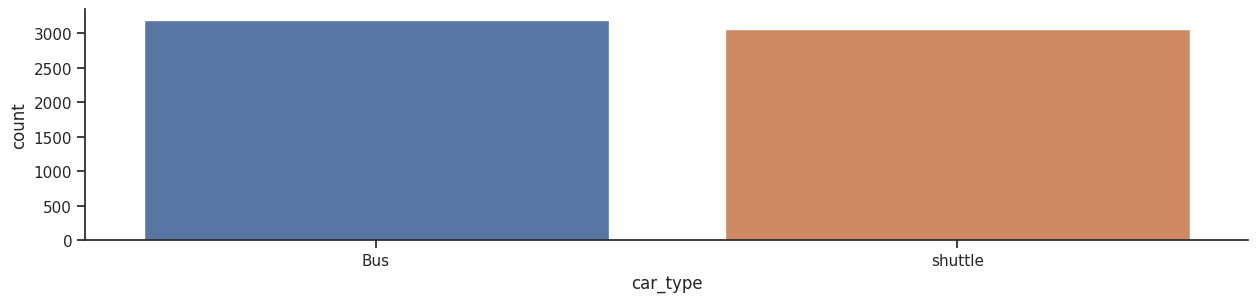

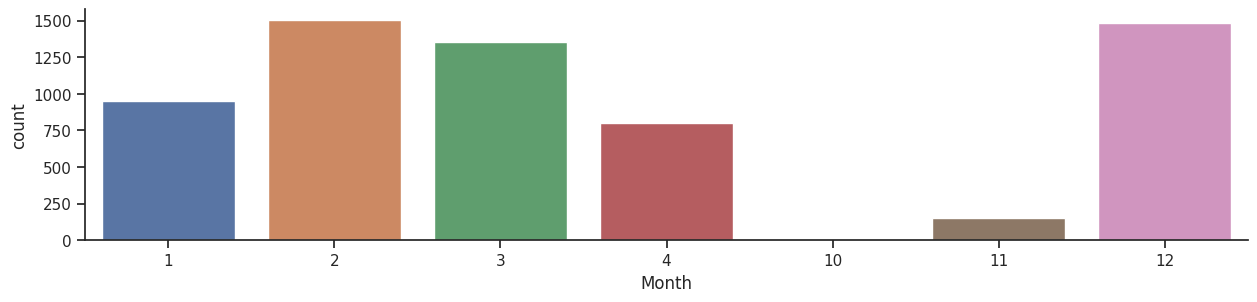

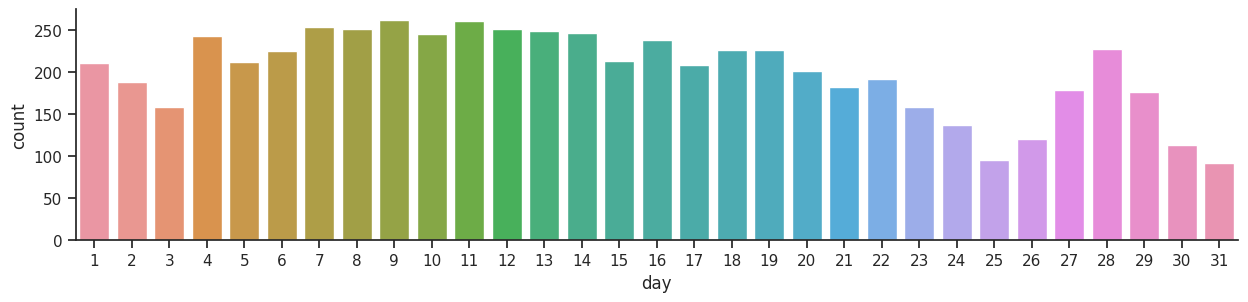

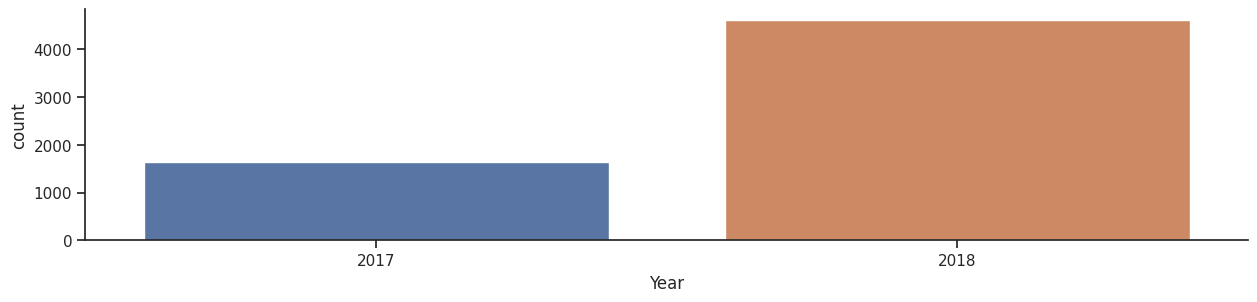

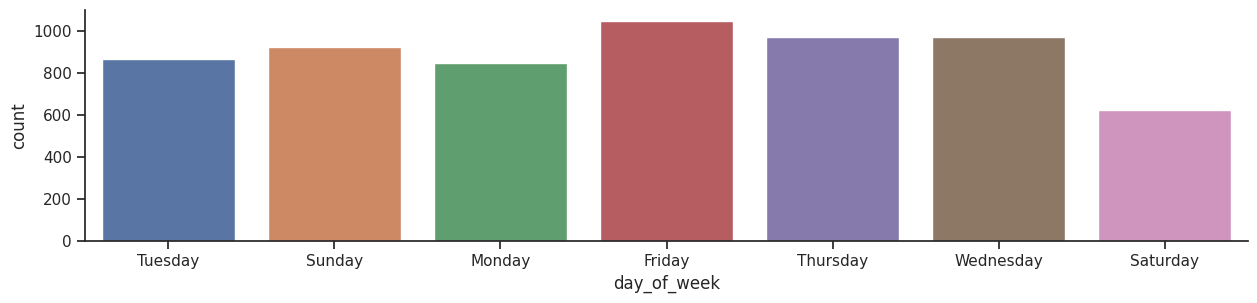

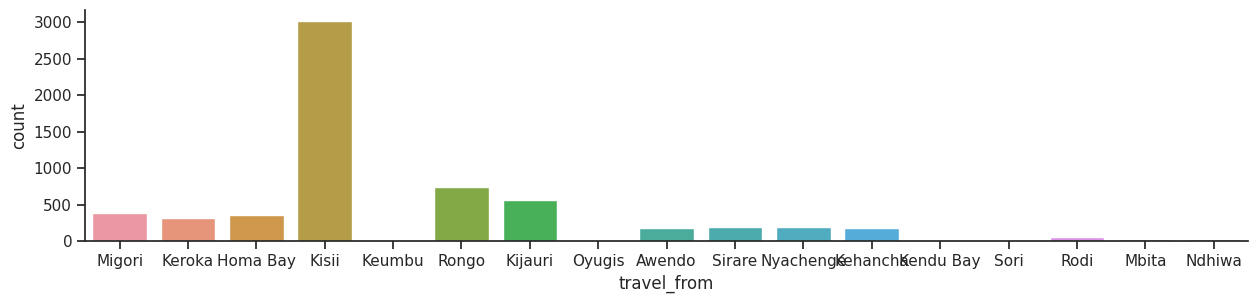

In [ ]:
# Lets Visualize the distributions of the Categorical column using count plot

plot_count_cols = ['max_capacity','car_type','Month','day', 'Year','day_of_week', 'travel_from']
for plots in plot_count_cols:
    plt.figure(figsize=(15,3))
    sns.countplot(x=plots,data=df)
    plt.show()



-Summary

-There are two type of cars: Bus and shuttle and the maximum capacity of the bus is 49 while shuttle can contain 11 travellers.

-Above plot shows that transport demand is maximum on Friday.

-Above plot shows that there were more transport demand in 2018 as compared to 2017.
-Above plot shows that maximum transport demand was in the month of Feb and Dec.




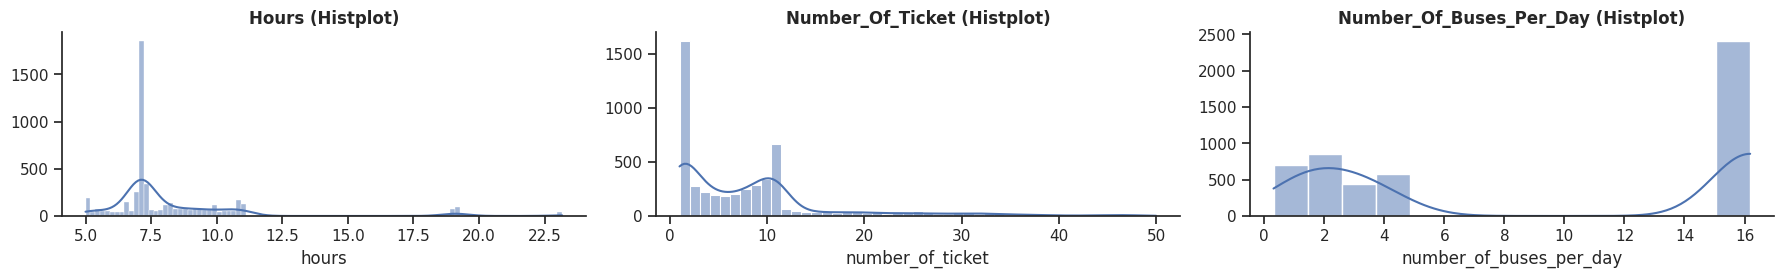

In [ ]:
#Lets Visualize the distributions of the Continuous columns using Histogram and Boxplot
plt.figure(figsize=(18,7.5))
for n,column in enumerate(Numerical_columns):
  plt.subplot(3, 3, n+1)
  sns.histplot(train[column], kde=True ).set(ylabel=None)
  plt.title(f'{column.title() + " (Histplot)"}',weight='bold')
  plt.tight_layout()
plt.show()

It shows peak hour of transport demand is between 6:30 AM to 7:30 AM and maximum no. of tickets sold is between 2-13.

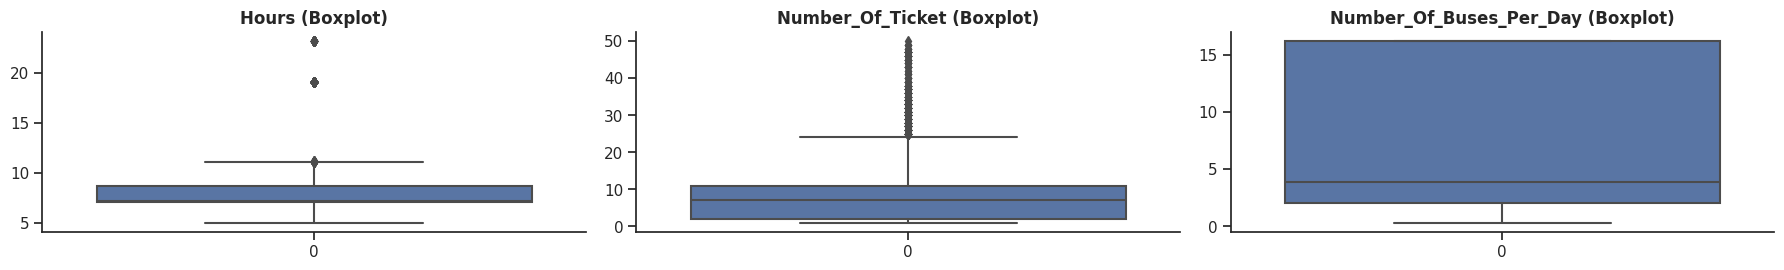

In [ ]:
plt.figure(figsize=(18,7.5))
for n,column in enumerate(Numerical_columns):
  plt.subplot(3, 3, n+1)
  sns.boxplot(train[column])
  plt.title(f'{column.title() + " (Boxplot)"}',weight='bold')
  plt.tight_layout()
plt.show()

Box plot also shows peak hours of transport demand is around 7AM and maximum no. of tickets sold is between 2-13.

In [ ]:
# Function to get amount of outliers in numerical columns
def outlier_prcnt(train, col_list):
    for col_name in col_list:
        q1 = train[col_name].quantile(0.25)
        q3 = train[col_name].quantile(0.75)
        iqr = q3-q1  #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        # Print total outlers and percentage using IQR method
        outliers = ((train[col_name] > fence_high) | (train[col_name] < fence_low)).sum()
        total = train[col_name].shape[0]
        print(f"Total outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")

# Lets get the amount of outliers in each numerical columns
outlier_prcnt(train, Numerical_columns)

Total outliers in hours are: 234 - 4.68%.
Total outliers in number_of_ticket are: 323 - 6.46%.
Total outliers in number_of_buses_per_day are: 0 - 0.0%.


### **Bivariant Variable Analysis**

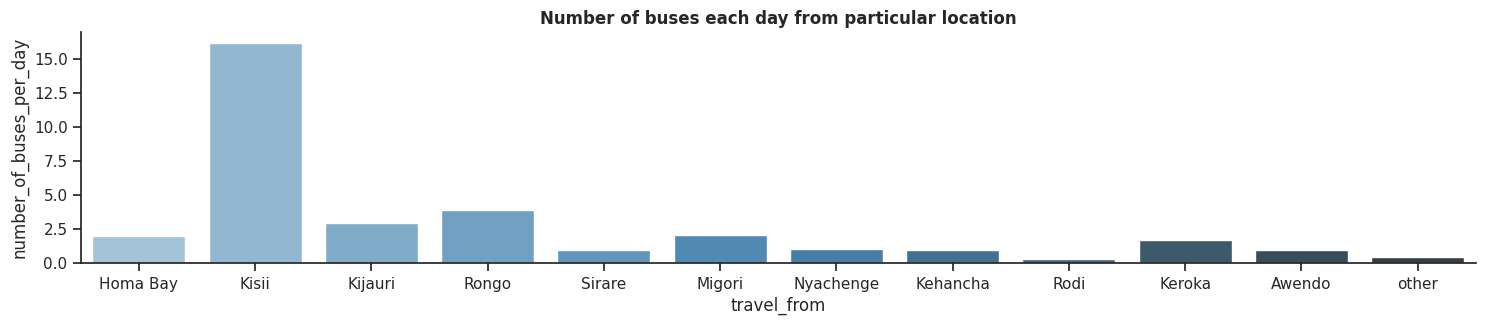

In [ ]:
# Bar plot of average of number of tickets sold each day of week.
plt.figure(figsize=(18,3))
plot = plt.subplot(1,1,1)
sns.barplot(x='travel_from', y='number_of_buses_per_day', data=train,ci=None,palette="Blues_d")
plt.title(f'Number of buses each day from particular location',weight='bold')

plt.show()

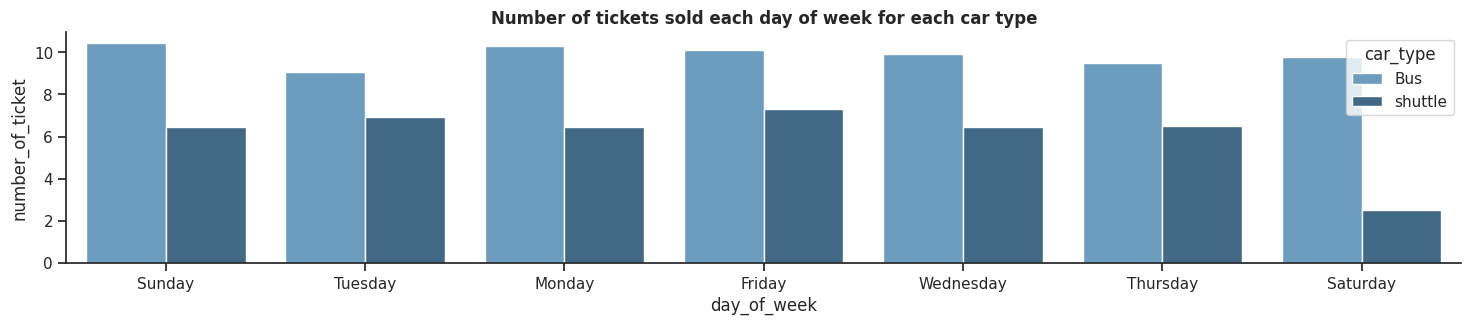

In [ ]:
# Bar plot of average of number of tickets sold each day of week.
plt.figure(figsize=(18,3))
plot = plt.subplot(1,1,1)
sns.barplot(x="day_of_week", y="number_of_ticket", data=train, hue = 'car_type',ci=None,palette="Blues_d")
plt.title(f'Number of tickets sold each day of week for each car type',weight='bold')

plt.show()

This plot shows more tickets were sold for bus each day as compared to shuttle.

In [ ]:
# tendecy_to_fill:
# value    when
# 3     -  percetnage of fill or avg ticket is more than above 80%
# 2     -  percetnage of fill or avg ticket is 50% to 80%
# 1     -  percetnage of fill or avg ticket is 20% to 50%
# 0     -  percetnage of fill or avg ticket is 0% to 20%

This shows maximum number of tickets were sold from sirare that too of bus.

In [ ]:
plt.figure(figsize=(18,3))
plot = plt.subplot(1,1,1)
sns.barplot(x='day', y="number_of_ticket", data=train,ci=None,palette="Blues_d")
plt.title(f'Number of tickets sold each day of month',weight='bold')

plt.show()

This shows avaerage no. of tickets sold each day of month.

In [ ]:
plt.figure(figsize=(18,3))
plot = plt.subplot(1,1,1)
sns.barplot(x="Month", y="number_of_ticket", data=train, hue = 'Year',ci=None,palette="Blues_d")
plt.title(f'Number of tickets sold each month',weight='bold')

plt.show()

This plot shows no. of tickets sold each month from the dataset we have.It shows less tickets were sold in Oct,Nov.

In [ ]:
df_grp = train.drop(['travel_from','car_type','max_capacity','day', 'Year','day_of_week','is_weekend'], axis = 1).groupby(by= ['Month'], as_index=True).mean().T

plt.figure(figsize=(12,4))
plt.title('Average value of all parameter in each Month \n', weight='bold', fontsize=18)
plot = sns.heatmap(df_grp, annot=True, linewidths=.8,linecolor='white',center=0, cmap="BrBG_r",annot_kws = {'size':18},cbar= False,fmt='.2f')
plt.show()

This shows average of number of tickets sold each hour of month

In [ ]:
df_grp = train.drop(['travel_from','car_type','max_capacity','Month','Year','day','is_weekend'], axis = 1).groupby(by= ['day_of_week'], as_index=True).mean().T

plt.figure(figsize=(12,4))
plt.title('Average value of all parameter in particular day of week \n', weight='bold', fontsize=18)
plot = sns.heatmap(df_grp, annot=True, linewidths=.5,linecolor='white',center=0, cmap="BrBG_r",annot_kws = {'size':18},cbar= False,fmt='.2f')
plt.show()

In [ ]:
plt.figure(figsize=(20,8))

sp = sns.scatterplot(x="travel_from", y="number_of_ticket", data=df)

It shows maximum number of tickets were sold from Sirare.

In [ ]:
plt.figure(figsize=(20,8))

sns.scatterplot(x='day', y="number_of_ticket", data=df)

Summary

-We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holiday of public transport between these days. We can also say that the number of tickets in all the days of month are same.

In [ ]:
plt.figure(figsize=(20,10))

sns.scatterplot(x='hours', y="number_of_ticket", data=df)

Summary
* We can see that most of the ticktes were sold at  7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

* From the above we can say that there is no ride between 12pm to 5.30pm

### **Multivariant Variable Analysis**

In [ ]:
# Correlation Analysis
plt.figure(figsize=(10,6))
plot = sns.heatmap(abs(df.corr()), annot=True,vmin=-1, center = 0, cbar= True,linewidths=.5,linecolor='white',cmap="YlGnBu", fmt='.2f')
plt.title('Correlation Heatmap Of Transport demand prediction \n', weight='bold', fontsize = 25)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
plt.show()

**Transport demand prediction - Correlation matrix**

* Maximum capacity and hours are positively correlated with number of tickets sold.

* Positive correlated:  maximum capacity > hours

* Negative correlated:  weekend > month > day > year

##   <b><u>  Data Prepossessing

###  <b> Checking for Multicollinearity

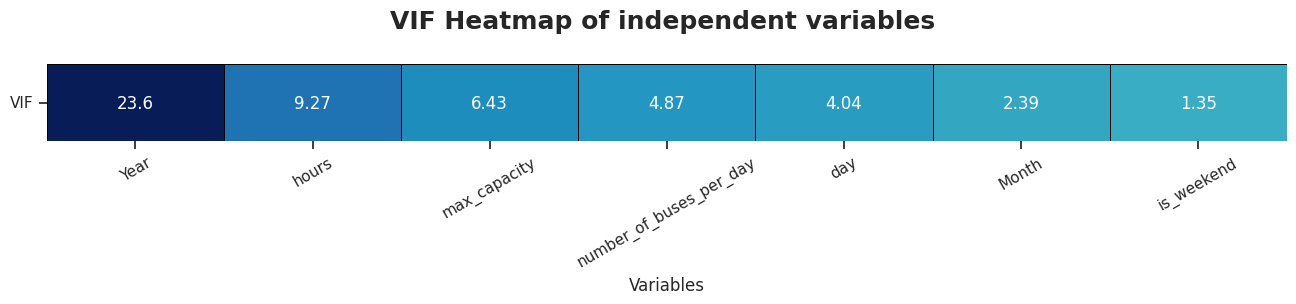

In [ ]:
# Check for the Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"]       = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif              = vif.sort_values(by='VIF',ascending=False).set_index('Variables')

    # Plot Heatmap
    plt.figure(figsize=(16,1))
    plt.title('VIF Heatmap of independent variables \n', weight='bold', fontsize=18)
    plot = sns.heatmap(vif.T, annot=True, linewidths=.5,linecolor='Black',center=0,  vmin = -1, cmap="YlGnBu",cbar=False,fmt='.3g')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
    plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
    plt.show()

calc_vif(train[[i for i in train.describe().columns if i not in ['number_of_ticket']]])

###  <b> Data Split

In [ ]:
train.columns

Index(['travel_from', 'car_type', 'max_capacity', 'day_of_week', 'Month',
       'day', 'Year', 'is_weekend', 'hours', 'number_of_ticket', 'Event_Name',
       'number_of_buses_per_day'],
      dtype='object')

In [ ]:
independent_columns = ['travel_from', 'car_type', 'max_capacity', 'day_of_week', 'Month', 'day', 'Year', 'is_weekend', 'hours','number_of_buses_per_day']
target_columns = ['number_of_ticket']

X_train = train[independent_columns]
X_test  = test[independent_columns]
y_train = train[target_columns]
y_test  = test[target_columns]

In [ ]:
train.head()

,travel_from,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,hours,number_of_ticket,Event_Name,number_of_buses_per_day
0,Homa Bay,Bus,49,Sunday,12,31,2017,1,7.150000,9,NaN,1.993289
1,Kisii,Bus,49,Tuesday,4,3,2018,0,7.116667,1,NaN,16.187919
2,Kijauri,shuttle,11,Monday,1,29,2018,0,5.666667,1,NaN,2.973154
3,Kijauri,shuttle,11,Monday,2,12,2018,0,6.500000,1,NaN,2.973154
4,Homa Bay,Bus,49,Friday,3,30,2018,0,7.183333,1,Good Friday,1.993289


##**Encoding Categorical features**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()

In [ ]:
# Label encode the categorical variable in X_train
X_train['day_of_week'] = le.fit_transform(X_train['day_of_week'])
X_train.head()

# # Label encode the categorical variable in X_test using the same encoder as X_train
X_test['day_of_week'] = le.transform(X_test['day_of_week'])
X_test.head()

,travel_from,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,hours,number_of_buses_per_day
0,Kisii,shuttle,11,3,2,4,2018,1,10.883333,16.187919
1,Kisii,shuttle,11,0,3,9,2018,0,9.000000,16.187919
2,Keroka,shuttle,11,6,2,14,2018,0,10.333333,1.697987
3,Kisii,shuttle,11,4,2,1,2018,0,10.166667,16.187919
4,Sirare,Bus,49,0,3,16,2018,0,6.983333,0.986577


In [ ]:
le_day = LabelEncoder()
# Label encode the categorical variable in X_train
X_train['day'] = le_day.fit_transform(X_train['day'])
X_train.head()

# # Label encode the categorical variable in X_test using the same encoder as X_train
X_test['day'] = le_day.transform(X_test['day'])
X_test.head()

,travel_from,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,hours,number_of_buses_per_day
0,Kisii,shuttle,11,3,2,3,2018,1,10.883333,16.187919
1,Kisii,shuttle,11,0,3,8,2018,0,9.000000,16.187919
2,Keroka,shuttle,11,6,2,13,2018,0,10.333333,1.697987
3,Kisii,shuttle,11,4,2,0,2018,0,10.166667,16.187919
4,Sirare,Bus,49,0,3,15,2018,0,6.983333,0.986577


In [ ]:
le_Year = LabelEncoder()
# Label encode the categorical variable in X_train
X_train['Year'] = le_Year.fit_transform(X_train['Year'])
X_train.head()

# # Label encode the categorical variable in X_test using the same encoder as X_train
X_test['Year'] = le_Year.transform(X_test['Year'])
X_test.head()

,travel_from,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,hours,number_of_buses_per_day
0,Kisii,shuttle,11,3,2,3,1,1,10.883333,16.187919
1,Kisii,shuttle,11,0,3,8,1,0,9.000000,16.187919
2,Keroka,shuttle,11,6,2,13,1,0,10.333333,1.697987
3,Kisii,shuttle,11,4,2,0,1,0,10.166667,16.187919
4,Sirare,Bus,49,0,3,15,1,0,6.983333,0.986577


In [ ]:
label_enc = {'Bus': 1, 'shuttle': 0}

X_train['car_type'] = X_train['car_type'].replace(label_enc)
X_test['car_type'] = X_test['car_type'].replace(label_enc)

X_test.head()

,travel_from,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,hours,number_of_buses_per_day
0,Kisii,0,11,3,2,3,1,1,10.883333,16.187919
1,Kisii,0,11,0,3,8,1,0,9.000000,16.187919
2,Keroka,0,11,6,2,13,1,0,10.333333,1.697987
3,Kisii,0,11,4,2,0,1,0,10.166667,16.187919
4,Sirare,1,49,0,3,15,1,0,6.983333,0.986577


In [ ]:
X_train.head()

,travel_from,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,hours,number_of_buses_per_day
0,Homa Bay,1,49,3,12,30,0,1,7.150000,1.993289
1,Kisii,1,49,5,4,2,1,0,7.116667,16.187919
2,Kijauri,0,11,1,1,28,1,0,5.666667,2.973154
3,Kijauri,0,11,1,2,11,1,0,6.500000,2.973154
4,Homa Bay,1,49,0,3,29,1,0,7.183333,1.993289


In [ ]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.binary  import BinaryEncoder

In [ ]:
# Set up the encoder
OH = OneHotEncoder(cols = ['travel_from'], )
# Fit and transform the encoder
X_train = OH.fit_transform(X_train)
X_test  = OH.transform(X_test)

# # display the encoded data
X_test.head()

,travel_from_1,travel_from_2,travel_from_3,travel_from_4,travel_from_5,travel_from_6,travel_from_7,travel_from_8,travel_from_9,travel_from_10,travel_from_11,travel_from_12,travel_from_13,travel_from_14,travel_from_15,travel_from_16,travel_from_17,car_type,max_capacity,day_of_week,Month,day,Year,is_weekend,hours,number_of_buses_per_day
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,3,2,3,1,1,10.883333,16.187919
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,3,8,1,0,9.000000,16.187919
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,11,6,2,13,1,0,10.333333,1.697987
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,4,2,0,1,0,10.166667,16.187919
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,49,0,3,15,1,0,6.983333,0.986577


#**Machine learning**

###**Importing ML modules and packages**

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, make_scorer,mean_absolute_percentage_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
import math

import warnings
warnings.filterwarnings('ignore')

###**Defining Important functions for model evaluation**

In [ ]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

    '''
    Takes regression model and train test splits as input and prints the
    evaluation matrices with the plot and returns the model

    Parameters
    ----------
    model     : ML Model
    X_train   : Training independent columns
    y_train   : Training target column
    X_test    : Testing independent columns
    y_test    : Testing target columns
    feature   : Name of independent columns
    plotgraph : Plot the graph

    Returns
    -------
    It gives regression report and feature importances.
    '''

    # Fitting the model
    model.fit(X_train,y_train)
    y_train = (y_train)
    y_test  = (y_test)

    # Calculate and Print Evaluation Matrix
    y_train_pred = (model.predict(X_train))
    MSE_train    = mean_squared_error(y_train,y_train_pred)
    RMSE_train   = np.sqrt(MSE_train)
    MAE_train    = mean_absolute_error(y_train,y_train_pred)
    MAPE_train   = mean_absolute_percentage_error(y_train,y_train_pred)
    R2_train     = r2_score(y_train,y_train_pred)
    AR2_train    = 1-(1-R2_train)*((len(X_train)-1)/(len(X_train)-X_train.shape[1]-1))

    y_test_pred = (model.predict(X_test))
    MSE_test    = mean_squared_error(y_test,y_test_pred)
    RMSE_test   = np.sqrt(MSE_test)
    MAE_test    = mean_absolute_error(y_test,y_test_pred)
    MAPE_test   = mean_absolute_percentage_error(y_test,y_test_pred)
    R2_test     = r2_score(y_test,y_test_pred)
    AR2_test    = 1-(1-R2_test)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

    Evaluate_matrx = {'Train': [round(MSE_train , 2), round(RMSE_train, 2), round(MAE_train , 2), round(R2_train , 2), round(AR2_train , 2)],
                      'Test' : [round(MSE_test , 2) , round(RMSE_test, 2) , round(MAE_test , 2) , round(R2_test  , 2), round(AR2_test  , 2)]}
    Evaluate_df   = pd.DataFrame(Evaluate_matrx, index= ['MSE', 'RMSE', 'MAE', 'R²', 'Adj. R²'])
    print(Evaluate_df)
    print()



In [ ]:
def cross_validation_r2(model, X_train, y_train, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    return round(scores.mean(), 2)
    print(f"The cross validation R² Score is {cross_validation_r2(model)}.")

###**Machine learning Model Testing**

In [ ]:
# Define the Regressor model
lr = LinearRegression()

# Analysing the regression model
LR = analyse_model(lr, X_train, X_test, y_train, y_test)

# Calculate cross-validation R² score
cv_r2 = cross_validation_r2(lr, X_train, y_train)

print(f"The cross validation R² Score is {cv_r2}.")


         Train   Test
MSE      45.18  50.99
RMSE      6.72   7.14
MAE       4.65   4.82
R²        0.37   0.42
Adj. R²   0.36   0.40

The cross validation R² Score is 0.36.


In [ ]:
# Define the Regressor model
regressor = DecisionTreeRegressor(random_state=2)

# Analysing the regression model
DTR = analyse_model(regressor, X_train, X_test, y_train, y_test)

# Calculate cross-validation R² score
cv_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2').mean()

print(f"The cross validation R² Score is {cv_r2}.")


         Train   Test
MSE       0.04  45.79
RMSE      0.19   6.77
MAE       0.00   3.85
R²        1.00   0.48
Adj. R²   1.00   0.46

The cross validation R² Score is 0.36903735789829406.


In [ ]:
# Define the Regressor model
regressor = RandomForestRegressor(random_state=2)
# Analysing the regression model
RNF = analyse_model(regressor, X_train, X_test, y_train, y_test)

# Calculate cross-validation R² score
cv_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2').mean()

print(f"The cross validation R² Score is {cv_r2}.")

         Train   Test
MSE       3.46  28.41
RMSE      1.86   5.33
MAE       1.16   3.33
R²        0.95   0.67
Adj. R²   0.95   0.67

The cross validation R² Score is 0.6315291512428047.


In [ ]:
# Define the Regressor model
regressor = GradientBoostingRegressor(random_state=2)
# Analysing the regression model
GBR = analyse_model(regressor, X_train, X_test, y_train, y_test)

# Calculate cross-validation R² score
cv_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2').mean()

print(f"The cross validation R² Score is {cv_r2}.")

         Train   Test
MSE      28.99  37.49
RMSE      5.38   6.12
MAE       3.74   4.04
R²        0.59   0.57
Adj. R²   0.59   0.56

The cross validation R² Score is 0.5537609824383236.


In [ ]:
# Define the Regressor model
regressor = XGBRegressor(random_state=2,objective='reg:squarederror')
# Analysing the regression model
XGB = analyse_model(regressor, X_train, X_test, y_train, y_test)

# Calculate cross-validation R² score
cv_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2').mean()

print(f"The cross validation R² Score is {cv_r2}.")

         Train   Test
MSE       7.54  30.31
RMSE      2.75   5.51
MAE       1.90   3.44
R²        0.89   0.65
Adj. R²   0.89   0.65

The cross validation R² Score is 0.6261086464151127.


In [ ]:
# Define the Regressor model
regressor = KNeighborsRegressor()
# Analysing the regression model
KNN = analyse_model(regressor, X_train, X_test, y_train, y_test)

# Calculate cross-validation R² score
cv_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2').mean()

print(f"The cross validation R² Score is {cv_r2}.")

         Train   Test
MSE      38.26  62.59
RMSE      6.19   7.91
MAE       3.93   4.98
R²        0.46   0.28
Adj. R²   0.46   0.27

The cross validation R² Score is 0.1544190877344654.


###**Model Comparison**

In [ ]:
def Compare_model():
    models = ['LR','DT','RF','GB','XGB', 'KNN']
    train_error = []
    test_error  = []
    cv_error    = []

    LR  = LinearRegression()
    DTR = DecisionTreeRegressor(random_state=2)
    RNF = RandomForestRegressor(random_state=2)
    GBR = GradientBoostingRegressor(random_state=2)
    XGB = XGBRegressor(random_state=2,objective='reg:squarederror')
    KNN = KNeighborsRegressor()
    model_trained = [LR, DTR, RNF, GBR, XGB, KNN]

    for model in model_trained:
        model.fit(X_train, y_train)
        train_error.append(round(r2_score(y_train , model.predict(X_train)),2))
        test_error.append (round(r2_score(y_test  , model.predict(X_test )),2))
        cv_error.append(cross_validation_r2(model, X_train, y_train))


    Eval_df = pd.DataFrame(data={'Train R²':train_error,'Test R²':test_error,'CV R²':cv_error}, index=models)
    Eval_df = Eval_df.sort_values(by=["Test R²"], ascending = False)
    Eval_df[Eval_df < 0] = 0
    fig, ax = plt.subplots(1, 2, figsize=(13, 3))
    Eval_df.plot(kind='bar', ax = ax[0]).set(title="Bar Plot Compairsion")
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, horizontalalignment='center')

    sns.heatmap(Eval_df.T, annot=True, linewidths=1, ax = ax[1], center = 0,linecolor='Black',cbar=False).set(title="Heat Map Compairsion")
    plt.suptitle('Compairsion of R2 of various Models',weight='bold')
    plt.tight_layout()
    plt.show()

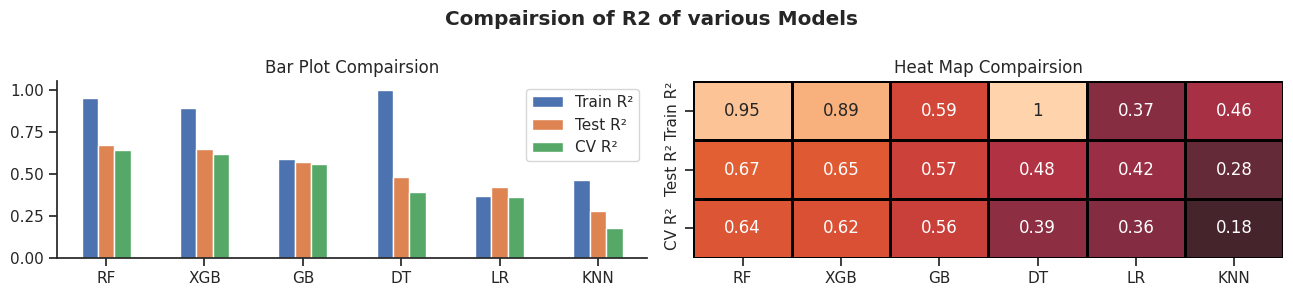

In [ ]:
Compare_model()

In [ ]:
#don't run it
def Compare_model():
    models = ['LR','DT','RF','GB','XGB', 'KNN']
    train_error = []
    test_error  = []
    cv_error    = []

    LR  = LinearRegression()
    DTR = DecisionTreeRegressor(random_state=2)
    RNF = RandomForestRegressor(random_state=2)
    GBR = GradientBoostingRegressor(random_state=2)
    XGB = XGBRegressor(random_state=2,objective='reg:squarederror')
    KNN = KNeighborsRegressor()
    model_trained = [LR, DTR, RNF, GBR, XGB, KNN]

    for model in model_trained:
        model.fit(X_train, y_train)
        train_error.append(round(r2_score(y_train , model.predict(X_train)),2))
        test_error.append (round(r2_score(y_test  , model.predict(X_test )),2))
        cv_error.append(cross_validation_r2(model, X_train, y_train))


    Eval_df = pd.DataFrame(data={'Train R²':train_error,'Test R²':test_error,'CV R²':cv_error}, index=models)
    Eval_df = Eval_df.sort_values(by=["Test R²"], ascending = False)
    Eval_df[Eval_df < 0] = 0
    fig, ax = plt.subplots(1, 2, figsize=(13, 3))
    Eval_df.plot(kind='bar', ax = ax[0]).set(title="Bar Plot Compairsion")
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, horizontalalignment='center')

    sns.heatmap(Eval_df.T, annot=True, linewidths=1, ax = ax[1], center = 0,linecolor='Black',cbar=False).set(title="Heat Map Compairsion")
    plt.suptitle('Compairsion of R2 of various Models',weight='bold')
    plt.tight_layout()
    plt.show()

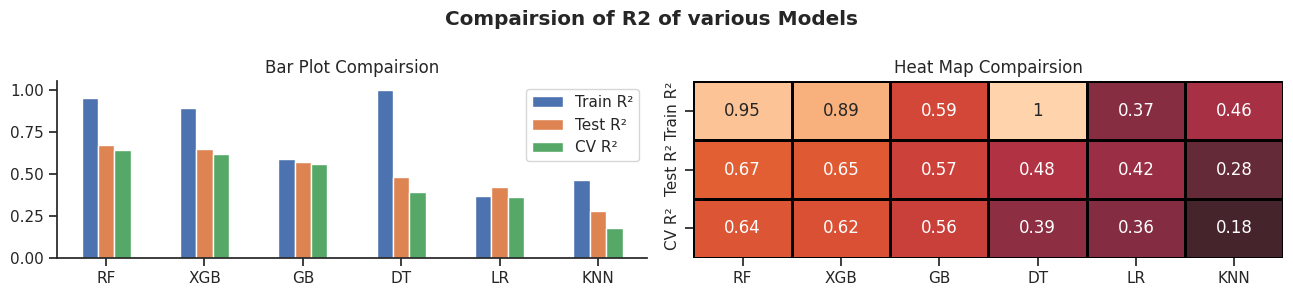

In [ ]:
# After random train test split and after droping ride_id column
Compare_model()

Selecting the Random Forest and XGBoost as the Cross validation R2 score and Test R2 score is very high as compare to other models

##**Hyperparameter Tuning**

In [ ]:
# Regressor
regressor = XGBRegressor(random_state=3,objective='reg:squarederror')

# HYperparameter Grid
grid = {'n_estimators' : [50,100,150],
        'max_depth' : [6,8,10],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgb = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
xgb.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(xgb.best_estimator_, X_train, X_test, y_train, y_test)

# Calculate cross-validation R² score
cv_r2 = cross_val_score(xgb.best_estimator_, X_train, y_train, cv=5, scoring='r2').mean()

print(f"The cross validation R² Score is {cv_r2}.")

         Train   Test
MSE      10.14  30.01
RMSE      3.18   5.48
MAE       2.17   3.42
R²        0.86   0.66
Adj. R²   0.86   0.65

The cross validation R² Score is 0.6408736231559304.


Let's find out feature importance of XGB model

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

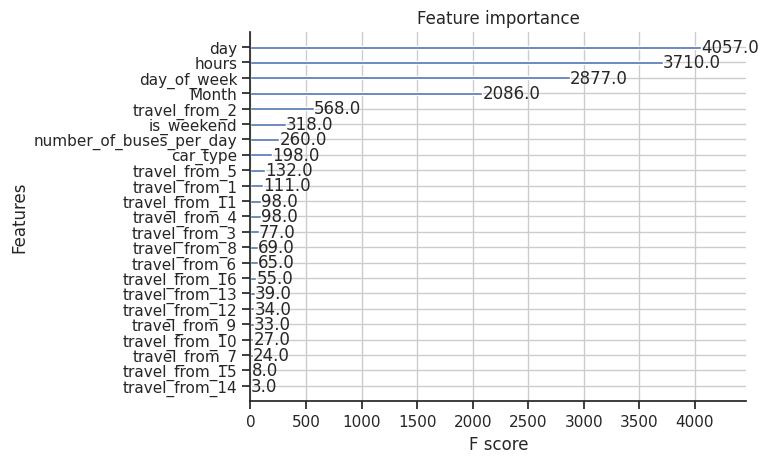

In [ ]:
import xgboost as xgb

# create XGBRegressor object with best hyperparameters
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=8, eta=0.1, random_state=3)

# fit the model on training data
xgb_model.fit(X_train, y_train)

# plot feature importance
xgb.plot_importance(xgb_model)


In [ ]:
# create RandomForestRegressor object
rf = RandomForestRegressor()

# define hyperparameter distributions
params = {"n_estimators": np.arange(100, 1000, 100),
          "max_depth": [None, 5, 10, 15, 20],
          "min_samples_split": np.arange(2, 10, 2),
          "min_samples_leaf": np.arange(1, 5),
          "max_features": ["auto", "sqrt", "log2"]}

# create RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, params, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# fit the model on training data
random_search.fit(X_train, y_train)

# print best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

# predict on test data using best model
y_pred = random_search.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
RMSE_test   = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Root mean squared Error: ",RMSE_test)

# Analysing the model with best set of parametes
analyse_model(random_search.best_estimator_, X_train, X_test, y_train, y_test)

# Calculate cross-validation R² score
cv_r2 = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5, scoring='r2').mean()

print(f"The cross validation R² Score is {cv_r2}.")


Best hyperparameters:  {'n_estimators': 800, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20}
Mean Squared Error:  28.22100026275923
Root mean squared Error:  5.312344140091004
         Train   Test
MSE       8.30  28.21
RMSE      2.88   5.31
MAE       1.86   3.33
R²        0.88   0.68
Adj. R²   0.88   0.67

The cross validation R² Score is 0.6421068314224069.


Let's find feature importance of random forest model

                    feature  importance
0                     hours    0.309447
1                       day    0.148018
2   number_of_buses_per_day    0.098593
3                     Month    0.080161
4             travel_from_6    0.057164
5             travel_from_1    0.056185
6             travel_from_5    0.056032
7               day_of_week    0.055789
8             travel_from_3    0.024050
9            travel_from_10    0.020140
10            travel_from_7    0.015985
11               is_weekend    0.012151
12            travel_from_2    0.011638
13                     Year    0.009646
14            travel_from_4    0.009559
15                 car_type    0.009536
16             max_capacity    0.009134
17           travel_from_11    0.004506
18            travel_from_8    0.004396
19           travel_from_16    0.003126
20           travel_from_13    0.001531
21            travel_from_9    0.001514
22           travel_from_15    0.000845
23           travel_from_12    0.000721


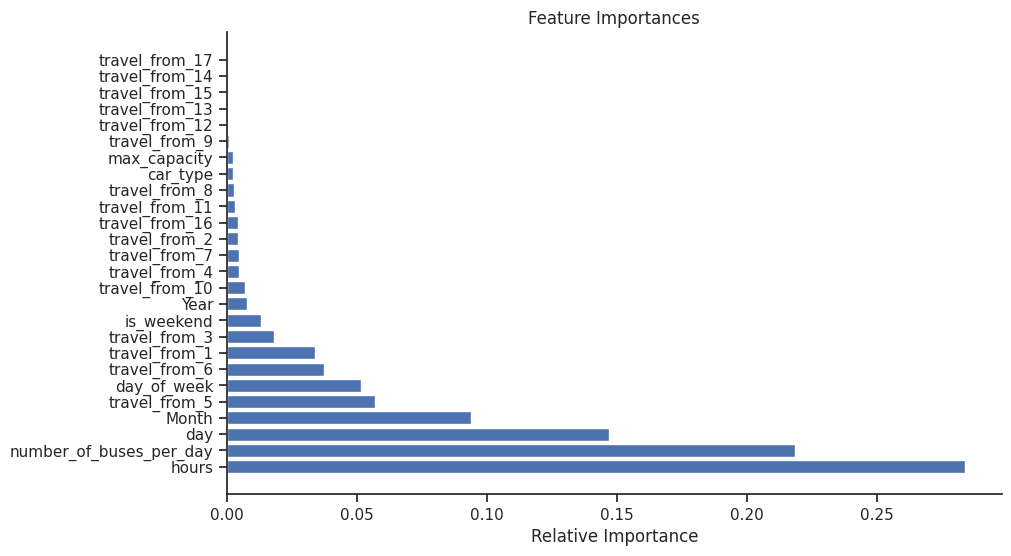

In [ ]:
# create RandomForestRegressor object with best hyperparameters
rf = RandomForestRegressor(n_estimators=500, max_depth=15, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)

# fit the model on training data
rf.fit(X_train, y_train)

# get feature importances
importances = rf.feature_importances_

# create a dataframe to store feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort the dataframe in descending order of importance
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

# print the feature importances
print(feature_importances)

import matplotlib.pyplot as plt

# Get feature importances from the model
importances = random_search.best_estimator_.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
sorted_names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), sorted_names)
plt.xlabel("Relative Importance")
plt.show()




##**Conclusion**

1. XGB and Random forest gave the best results as compared to all other models.

2. For XGBRegressor, the cross validation R2 is 0.629, Test R2 is 0.67, and train R2 is 0.78,MSE of test is 30.41 , RMSE of test is 5.51.
3. The random forest is also good model with cross validation R2 score of 0.63 , MSE of test is 27.65 , RMSE of test is 5.25.
